# Final Project: College Basketball Analytics

#### The goal of this project is to determine the factors that have led to team success in the past, and to try and determine what factors may lead to such success in the future.

#### K-State Honor Code:
"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work." 
    
    
#### Neel Ganta 

In [288]:
#import all libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# grid search
from sklearn.model_selection import GridSearchCV

#### The following few cells are the process of Data collection and preparation, I scraped all the college stats data I will be using for this project from kenpom.com.

In [289]:
#Creating big data frame containing all the variables from newest csv.
bdf = pd.read_csv('bigkenpom.csv')

In [290]:
bdf = bdf.drop(['Unnamed: 0'], axis =1)

In [291]:
#Checking the size of bdf file and ensuring there are the same amount of lines as initial file.

bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6157 entries, 0 to 6156
Data columns (total 40 columns):
Year                6157 non-null int64
Rank                6157 non-null int64
Team                6157 non-null object
Conference          6157 non-null object
Wins                6157 non-null int64
Losses              6157 non-null int64
Seed                1552 non-null float64
AdjEM               6157 non-null float64
AdjustO             6157 non-null float64
AdjustO Rank        6157 non-null int64
AdjustD             6157 non-null float64
AdjustD Rank        6157 non-null int64
AdjustT             6157 non-null float64
AdjustT Rank        6157 non-null int64
Luck                6157 non-null float64
Luck Rank           6157 non-null int64
SOS AdjEM           6157 non-null float64
SOS AdjEM Rank      6157 non-null int64
SOS OppO            6157 non-null float64
SOS OppO Rank       6157 non-null int64
SOS OppD            6157 non-null float64
SOS OppD Rank       6157 non-null

In [292]:
#Converiting the year column from object to string for future manipulation
bdf['Year'] = bdf['Year'].astype(str)

In [293]:
#Striping the team names of spaces.
bdf['Team'] = bdf['Team'].str.strip()
len((bdf['Team']).unique())

370

In [294]:
#Stripping the year names of spaces
bdf['Year'] = bdf['Year'].str.strip()
len((bdf['Year']).unique())

18

In [295]:
#Creating a KSU dataframe and ensuring all years are there.
ksu = bdf.loc[bdf['Team']== 'Kansas St.']
ksu

Year  Rank        Team Conference  Wins  Losses  Seed  AdjEM  AdjustO  \
127   2002   120  Kansas St.        B12    13      16   NaN   3.67    104.0   
454   2003    60  Kansas St.        B12    13      17   NaN  10.87    107.9   
781   2004    83  Kansas St.        B12    14      14   NaN   8.89    104.6   
1107  2005    71  Kansas St.        B12    17      12   NaN  10.14    109.9   
1437  2006    77  Kansas St.        B12    15      13   NaN   9.59    105.9   
1771  2007    57  Kansas St.        B12    23      12   2.0  13.71    109.3   
2109  2008    26  Kansas St.        B12    21      12  11.0  18.90    114.2   
2452  2009    51  Kansas St.        B12    22      12   4.0  14.18    109.4   
2796  2010     6  Kansas St.        B12    29       8   2.0  25.52    116.1   
3143  2011    32  Kansas St.        B12    23      11   5.0  17.42    111.1   
3487  2012    23  Kansas St.        B12    22      11   8.0  17.52    109.8   
3832  2013    27  Kansas St.        B12    27       8   4.0  18.16    113.5   
4182  2014    45  Kansas St.        B12    20      13   9.0  14.10    107.8   
4533  2015    81  Kansas St.        B12    15      17   NaN   8.18    106.6   
4884  2016    55  Kansas St.        B12    17      16   NaN  13.46    108.8   
5234  2017    30  Kansas St.        B12    21      14  11.0  17.44    113.0   
5585  2018    42  Kansas St.        B12    25      12   9.0  14.77    110.1   
5936  2019    49  Kansas St.        B12     0       0   NaN  14.35    104.2   

      AdjustO Rank  ...  O_FT_Rate  O_Rank_FT_Rate  D_eFG_Pct  D_Rank_eFG_Pct  \
127            146  ...  37.151300             146  47.418400              88   
454             73  ...  34.807900             122  45.780000              29   
781            131  ...  32.473900              68  45.426600              24   
1107            54  ...  30.525600              54  49.932600             194   
1437           117  ...  33.140700              96  45.696900              33   
1771            91  ...  37.863600             196  46.721300              46   
2109            34  ...  38.334300             204  48.345300              97   
2452            72  ...  48.797600             333  47.507300              96   
2796            15  ...  47.368400             314  46.811700              80   
3143            56  ...  45.333300             299  47.304300              85   
3487            59  ...  41.771400             278  46.000000              42   
3832            23  ...  36.787600             194  47.495700             127   
4182           125  ...  45.377700             276  45.321300              26   
4533           120  ...  40.979500             251  49.721000             201   
4884           101  ...  38.824820             225  56.617200             348   
5234            42  ...  33.420094             132  49.557522             122   
5585            78  ...  36.786256             250  49.140980              80   
5936           105  ...  30.729167             123  48.234954              59   

       D_TO_Pct  D_Rank_TO_Pct   D_OR_Pct  D_Rank_OR_Pct  D_FT_Rate  \
127   19.693500            256  36.108500            249  37.151300   
454   18.450300            299  30.615900             42  34.807900   
781   20.002400            237  32.675100            112  32.473900   
1107  19.722400            250  31.298100             55  30.525600   
1437  21.342800            158  34.844700            209  33.140700   
1771  22.115600            109  33.471400            166  37.863600   
2109  22.376100             91  30.478300             73  38.334300   
2452  23.809300             18  31.923400            131  48.797600   
2796  23.583900             24  33.436300            208  47.368400   
3143  22.176800             60  30.692600             97  45.333300   
3487  23.494000             27  33.069100            219  41.771400   
3832  22.180400             53  33.791200            257  36.787600   
4182  19.006900            121  33.218300

In [296]:
#Creating an Illinois dataframe and ensuring all years are there.
illinois = bdf.loc[bdf['Team']== 'Illinois']
illinois

Year  Rank      Team Conference  Wins  Losses  Seed  AdjEM  AdjustO  \
114   2002     8  Illinois        B10    26       9   4.0  23.21    115.7   
441   2003     5  Illinois        B10    25       7   4.0  24.47    113.2   
768   2004    13  Illinois        B10    26       7   5.0  22.11    117.8   
1094  2005     2  Illinois        B10    37       2   1.0  32.68    122.3   
1424  2006     9  Illinois        B10    26       7   4.0  23.20    114.5   
1758  2007    36  Illinois        B10    23      12  12.0  17.50    107.3   
2096  2008    51  Illinois        B10    16      19   NaN  13.47    107.5   
2439  2009    25  Illinois        B10    24      10   5.0  18.72    106.8   
2783  2010    57  Illinois        B10    21      15   1.0  14.38    109.2   
3130  2011    18  Illinois        B10    20      14   9.0  20.14    113.3   
3474  2012    76  Illinois        B10    17      15   NaN   9.49    104.3   
3819  2013    39  Illinois        B10    23      13   7.0  15.82    110.6   
4168  2014    53  Illinois        B10    20      15   2.0  13.10    106.5   
4519  2015    61  Illinois        B10    19      14   3.0  11.68    108.3   
4870  2016   125  Illinois        B10    15      19   NaN   3.91    106.9   
5220  2017    66  Illinois        B10    20      15   2.0  11.31    107.2   
5571  2018   102  Illinois        B10    14      18   NaN   6.67    109.6   
5922  2019    35  Illinois        B10     0       0   NaN  16.51    111.0   

      AdjustO Rank  ...  O_FT_Rate  O_Rank_FT_Rate  D_eFG_Pct  D_Rank_eFG_Pct  \
114             17  ...  31.563100              58  52.504500             281   
441             22  ...  39.011400             213  53.674000             300   
768              8  ...  43.196500             262  51.295900             246   
1094             3  ...  28.087800              23  50.250800             213   
1424            18  ...  37.675800             204  45.780900              35   
1758           116  ...  36.872600             177  49.967800             160   
2096           111  ...  35.439400             147  46.467500              33   
2439           104  ...  31.008600              55  46.861600              72   
2783            73  ...  31.374800              49  48.745000             157   
3130            34  ...  34.586900             100  48.982700             160   
3474           145  ...  30.898000              52  47.894500             127   
3819            46  ...  33.954200             124  48.350200             161   
4168           146  ...  42.262900             219  48.752100             127   
4519            91  ...  40.265000             239  46.975800              85   
4870           142  ...  36.599100             164  53.603600             324   
5220           123  ...  30.072464              58  49.948240             144   
5571            86  ...  47.935921             350  53.265558             282   
5922            20  ...  42.389525             338  52.154937             245   

       D_TO_Pct  D_Rank_TO_Pct   D_OR_Pct  D_Rank_OR_Pct  D_FT_Rate  \
114   22.599000             97  31.719900             70  31.563100   
441   20.667000            210  30.585600             39  39.011400   
768   21.044100            180  31.624900             78  43.196500   
1094  20.029700            230  32.624500            104  28.087800   
1424  23.402600             59  31.345800             52  37.675800   
1758  23.460900             46  31.717400             82  36.872600   
2096  22.062700            106  31.222500             94  35.439400   
2439  19.508400            218  27.002100              6  31.008600   
2783  20.695300            154  27.935800             21  31.374800   
3130  18.565400            263  27.476800             14  34.586900   
3474  17.137600            314  27.013100             22  30.898000   
3819  21.008800            111  31.402200            151  33.954200   
4168  20.244600             51  31.476800            179  42.262900   
4519  20

## Statistical Analysis and Visualization

Below is an explanation of the teams DataFrame attribtues.

- Year                Year
<br>

- Rank                Ranking in that year for corresponding team
<br>

- Team                Team name
<br>

- Conference          Conference the team is in
<br>

- Wins                Number of wins
<br>
- Losses              Number of losses
<br>
- Seed                Tournament Seed (If in the tournament)
<br>
- AdjEM               
    - Adjusted Efficiency Margin, or AdjEM, is the difference between a team’s offensive and defensive efficiency. AdjEM = AdjOE - AdjDE 
    - AdjEM is used to rate teams. 
<br>
- AdjustO             

    - Adjusted offensive efficiency – An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average D-I defense.
<br>
- AdjustO Rank        Adjusted offesive efficiency ranking among all teams
<br>
- AdjustD             

    - Adjusted defensive efficiency – An estimate of the defensive efficiency (points scored per 100 possessions) a team would have against the average D-I offense.
<br>
- AdjustD Rank        Adjusted defensive efficiency ranking among all teams
<br>
- AdjustT             

    - Adjusted tempo – An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average D-I tempo.
<br>
- AdjustT Rank        Adjusted tempo  ranking among all teams
<br>
- Luck                
    - Luck doesn’t factor into a team’s rating. It’s a metric that compares a team’s record to what they deserved based on their game-by-game efficiency.

        If a team is involved in a lot of close games, it shouldn’t win or lose all of them. If a team wins all of the close games, they’re viewed as a lucky. An unlucky team would lose all of their close games.

        Luck = NORM (AdjOE - AdjDE) / SD(Rating Difference)
   <br>     
    
- Luck Rank           Rank of luck among all teams
<br>
- SOS AdjEM           
    - A team’s strength of schedule is made up of 3 components.

    - The 3 components:

        AdjEM is the overall strength of schedule of a team
        AdjO - Opponent’s average adjusted offensive efficiency
        AdjD - Opponent’s average adjusted defensive efficiency
        AdjEM for strength of schedule is calculated:

        AdjEM of SOS = AdjO - AdjD

        A team’s AdjEM for SOS is difference between the average of its opponents’ offensive and defensive efficiencies.
   <br>     
- SOS AdjEM Rank      SOS AdjEm rank among all teams
<br>
- SOS OppO            Average Adjusted Offensive Efficiency of opposing Offenses
<br>
- SOS OppO Rank       SOS OppO ranking among all teams
<br>
- SOS OppD            Average Adjusted Offensive Efficiency of opposing Offenses
<br>
- SOS OppD Rank       SOS OppO ranking among all teams
<br>
- NCSOS AdjEM         Non-conference strength of schedule Adjusted Efficiency Margin
<br>
- NCSOS AdjEM Rank    Ranking for Non-conference strength of schedule Adjusted Efficiency Margin among all teams
<br>
- O_eFG_Pct           Offenses Effective Field Goal %

    - Effective Field Goal Percentage, or eFG%, is calculated the following way:
        (2pt FGM + 1.5*3pt FGM) / FGA
   <br>     
- O_Rank_eFG_Pct      Offenses Effective Field Goal % ranking among all teams
<br>
- O_TO_Pct            Offenses turnover %

    - Turnover percentage is a pace-independent measure of ball security.
    
        TO% = TO / Possessions

<br>
- O_Rank_TO_Pct       Offenses turnover % ranking among all teams
<br>
- O_OR_Pct            Offenses offensive rebounding percentage

    -  is a measure of the possible rebounds that are gathered by the offense.

        OR% = OR / (OR + DRopp)
<br>
- O_Rank_OR_Pct       Offenses offensive rebounding percentage ranking among all teams
<br>
- O_FT_Rate           Offenses free throw rate

    - Finally, free throw rate captures a team’s ability to get to the free throw line.

        FTRate = FTA / FGA
<br>
- O_Rank_FT_Rate      Offenses free throw rate ranking among all teams
<br>
- D_eFG_Pct           Defenses Effective Field Goal % allowed by the offense

    - Effective Field Goal Percentage, or eFG%, is calculated the following way:
        (2pt FGM + 1.5*3pt FGM) / FGA
   <br>     
- D_Rank_eFG_Pct      Defenses Effective Field Goal % ranking among all teams
<br>
- D_TO_Pct            Defenses turnover % forced

    - Turnover percentage is a pace-independent measure of ball security.
    
        TO% = TO / Possessions

<br>
- D_Rank_TO_Pct       Defenses turnover % ranking among all teams
<br>
- D_OR_Pct            Defenses offensive rebounding percentage allowed by the offense

    -  is a measure of the possible rebounds that are gathered by the offense.

        OR% = OR / (OR + DRopp)
<br>
- D_Rank_OR_Pct       Defenses offensive rebounding percentage ranking among all teams
<br>
- D_FT_Rate           Defenses free throw rate allowed by the offense

    - Finally, free throw rate captures a team’s ability to get to the free throw line.

        FTRate = FTA / FGA
<br>
- D_Rank_FT_Rate      Defenses free throw rate ranking among all teams

In [297]:
bdf.corr()

Rank      Wins    Losses      Seed     AdjEM   AdjustO  \
Rank              1.000000 -0.688631  0.602108  0.610511 -0.980479 -0.866746   
Wins             -0.688631  1.000000 -0.332336 -0.366380  0.705888  0.682932   
Losses            0.602108 -0.332336  1.000000  0.244743 -0.622870 -0.514876   
Seed              0.610511 -0.366380  0.244743  1.000000 -0.646554 -0.529825   
AdjEM            -0.980479  0.705888 -0.622870 -0.646554  1.000000  0.890452   
AdjustO          -0.866746  0.682932 -0.514876 -0.529825  0.890452  1.000000   
AdjustO Rank      0.893864 -0.627169  0.552204  0.508818 -0.884614 -0.961018   
AdjustD           0.837324 -0.533804  0.573870  0.486827 -0.846450 -0.511428   
AdjustD Rank      0.856485 -0.584604  0.503044  0.478279 -0.846323 -0.537818   
AdjustT           0.054073 -0.209263 -0.231901 -0.000015 -0.047123  0.004543   
AdjustT Rank     -0.048789 -0.001910 -0.002739  0.003706  0.046719 -0.032145   
Luck              0.012229  0.263055 -0.256187  0.180997 -0.004206  0.005490   
Luck Rank        -0.008303 -0.038240  0.470016 -0.158982 -0.002278  0.023568   
SOS AdjEM        -0.715790  0.300620 -0.223081 -0.622510  0.725505  0.636665   
SOS AdjEM Rank    0.653443 -0.077294  0.426436  0.630964 -0.659856 -0.543117   
SOS OppO         -0.103931  0.550965  0.563201 -0.577574  0.093221  0.164171   
SOS OppO Rank     0.631155 -0.070838  0.422985  0.601992 -0.639124 -0.527332   
SOS OppD          0.064421  0.480235  0.615626  0.575888 -0.077408  0.014424   
SOS OppD Rank     0.624352 -0.064519  0.415831  0.624619 -0.629709 -0.512591   
NCSOS AdjEM       0.027794  0.001501  0.000038  0.151317 -0.021030 -0.009433   
NCSOS AdjEM Rank -0.012130  0.183488  0.230785 -0.133843  0.002803  0.024503   
O_eFG_Pct         0.402224 -0.391231  0.259575  0.158276 -0.403083 -0.197828   
O_Rank_eFG_Pct    0.410920 -0.354031  0.314068  0.140635 -0.407699 -0.210273   
O_TO_Pct         -0.047271  0.098121 -0.004374  0.053696  0.029750 -0.101301   
O_Rank_TO_Pct     0.027394 -0.071108  0.064359 -0.037438 -0.029146  0.079311   
O_OR_Pct          0.210358 -0.096155  0.309089  0.049671 -0.235623 -0.200145   
O_Rank_OR_Pct     0.271246 -0.222581  0.211335  0.033784 -0.272740 -0.199426   
O_FT_Rate         0.238017 -0.124120  0.250161  0.160271 -0.247982 -0.253767   
O_Rank_FT_Rate    0.249197 -0.201718  0.166772  0.156516 -0.255083 -0.269033   
D_eFG_Pct         0.402224 -0.391231  0.259575  0.158276 -0.403083 -0.197828   
D_Rank_eFG_Pct    0.410920 -0.354031  0.314068  0.140635 -0.407699 -0.210273   
D_TO_Pct         -0.047271  0.098121 -0.004374  0.053696  0.029750 -0.101301   
D_Rank_TO_Pct     0.027394 -0.071108  0.064359 -0.037438 -0.029146  0.079311   
D_OR_Pct          0.210358 -0.096155  0.309089  0.049671 -0.235623 -0.200145   
D_Rank_OR_Pct     0.271246 -0.222581  0.211335  0.033784 -0.272740 -0.199426   
D_FT_Rate         0.238017 -0.124120  0.250161  0.160271 -0.247982 -0.253767   
D_Rank_FT_Rate    0.249197 -0.201718  0.166772  0.156516 -0.255083 -0.269033   

                  AdjustO Rank   AdjustD  AdjustD Rank   AdjustT  ...  \
Rank                  0.893864  0.837324      0.856485  0.054073  ...   
Wins                 -0.627169 -0.533804     -0.584604 -0.209263  ...   
Losses                0.552204  0.573870      0.503044 -0.231901  ...   
Seed                  0.508818  0.486827      0.478279 -0.000015  ...   
AdjEM                -0.884614 -0.846450     -0.846323 -0.047123  ...   
AdjustO              -0.961018 -0.511428     -0.537818  0.004543  ...   
AdjustO Rank          1.000000  0.545979      0.553938 -0.017299  ...   
AdjustD               0.545979  1.000000      0.968867  0.094236  ...   
AdjustD Rank          0.553938  0.968867      1.000000  0.117058  ...   
AdjustT              -0.017299  0.094236      0.117058  1.000000  ...   
AdjustT Rank          0.038196 -0.125854     -0.130159 -0.797614  ...   
Luck                  0.003333  0.014272      0.015921  0.030969  ...   
Luck Rank            -0.000588  

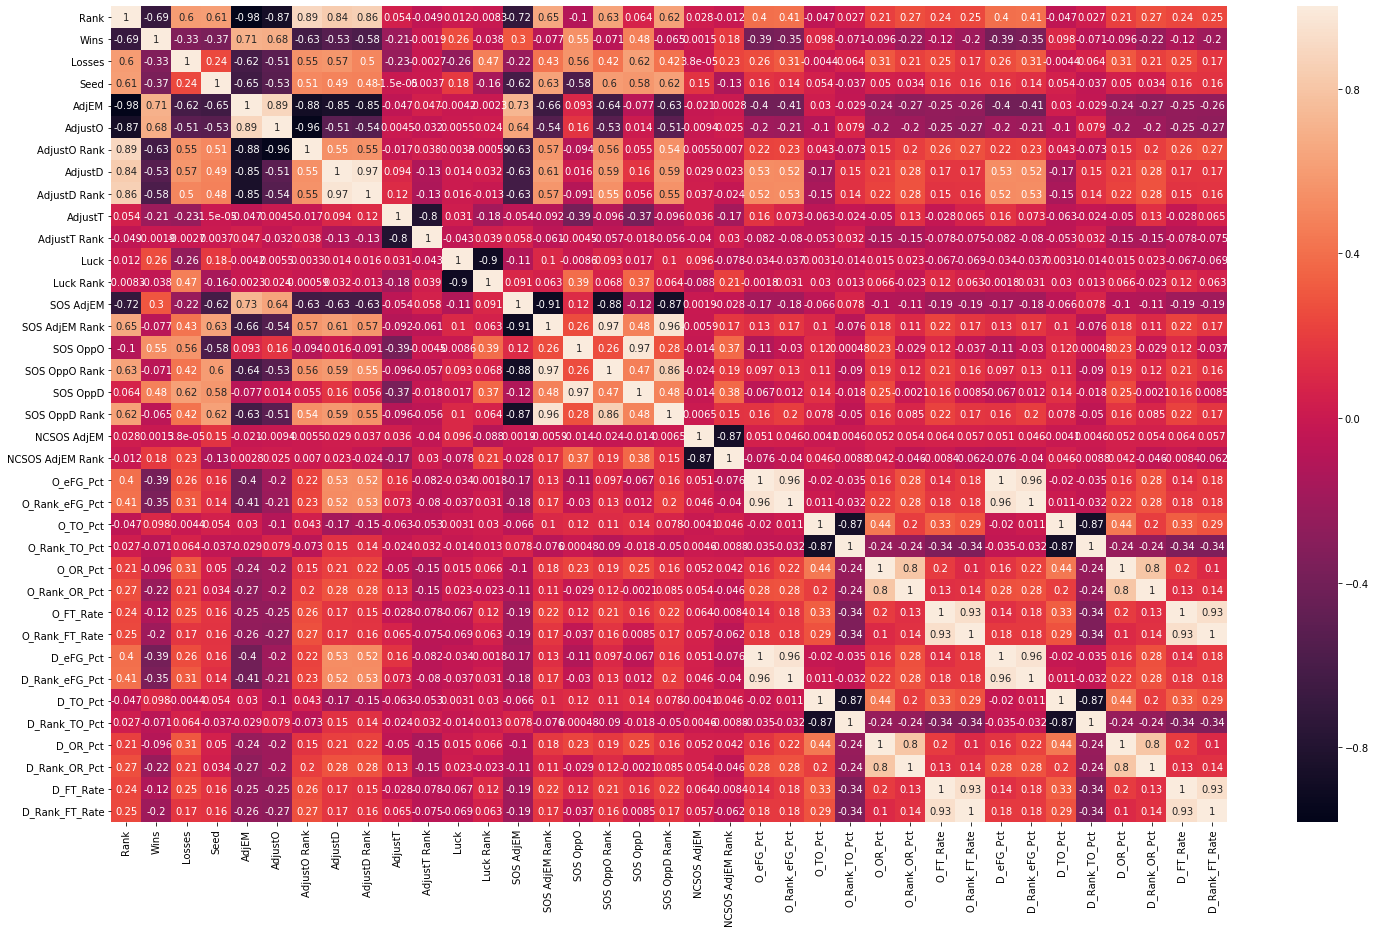

In [298]:
# correlation heatmap
plt.figure(figsize=(25,15))
sns.heatmap(bdf.corr(), annot=True)

#### There are clearly a lot of variables here, so I will drop a few and re-run the correlation analysis.

In [299]:
#creating new dataframe removing all the unnecessary rank columns.
no_rank = bdf.drop(['AdjustO Rank', 'AdjustD Rank', 'AdjustT Rank', 'Luck Rank', 'SOS AdjEM Rank','SOS OppO Rank', 'SOS OppD Rank',
                 'NCSOS AdjEM Rank', 'O_Rank_eFG_Pct', 'O_Rank_TO_Pct', 'O_Rank_OR_Pct', 'O_Rank_FT_Rate',
                 'D_Rank_eFG_Pct', 'D_Rank_TO_Pct', 'D_Rank_OR_Pct', 'D_Rank_FT_Rate'], axis = 1)
no_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6157 entries, 0 to 6156
Data columns (total 24 columns):
Year           6157 non-null object
Rank           6157 non-null int64
Team           6157 non-null object
Conference     6157 non-null object
Wins           6157 non-null int64
Losses         6157 non-null int64
Seed           1552 non-null float64
AdjEM          6157 non-null float64
AdjustO        6157 non-null float64
AdjustD        6157 non-null float64
AdjustT        6157 non-null float64
Luck           6157 non-null float64
SOS AdjEM      6157 non-null float64
SOS OppO       6157 non-null float64
SOS OppD       6157 non-null float64
NCSOS AdjEM    6157 non-null float64
O_eFG_Pct      6157 non-null float64
O_TO_Pct       6157 non-null float64
O_OR_Pct       6157 non-null float64
O_FT_Rate      6157 non-null float64
D_eFG_Pct      6157 non-null float64
D_TO_Pct       6157 non-null float64
D_OR_Pct       6157 non-null float64
D_FT_Rate      6157 non-null float64
dtypes: float6

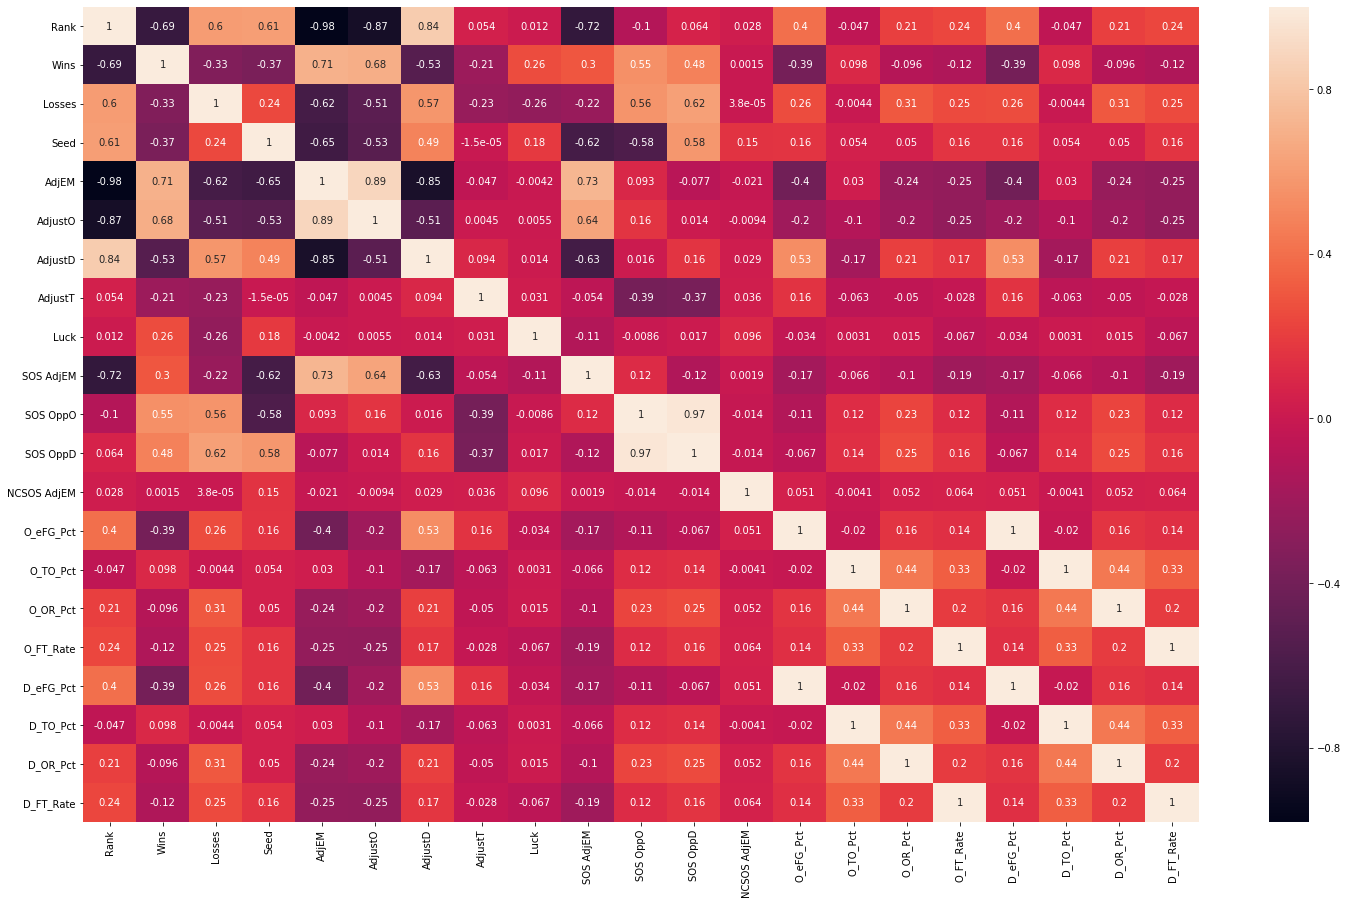

In [300]:
# correlation heatmap
plt.figure(figsize=(25,15))
sns.heatmap(no_rank.corr(), annot=True)

### From the updated heatmap, we can see that AdjEM and Wins are closely correlated, Wins and AdjO are closely related, AdjEm and Rank are almost perfectly inversely correlated, Rank and AdjO are inversely correlated, and Rank and AdjD are correlated. For the purpose of my study, I will be looking closely at Wins, Rank, and AdjEM as measures of team success.

In [301]:
fig = px.scatter(bdf, x = "AdjEM", y ="Wins", hover_name = 'Team', trendline='ols')
fig.update_traces(textposition='top center')

fig.update_layout(
    height=800,
    title_text='All Teams Wins vs AdjEM'
)


/Users/NeelGanta/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



Above is a scatterplot showing the regression line between Wins and Adjusted Efficiency Margin of all teams. The R^2 is .71, meaning these are closely related.

In [302]:
fig = px.scatter(ksu, x="AdjEM", y="Wins", text ="Year", trendline='ols')
fig.update_traces(textposition='top center')

fig.update_layout(
    height=800,
    title_text='Kansas State Wins vs AdjEM'
)


/Users/NeelGanta/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



Above is a dialed down scatterplot showing the regression line between Wins and Adjusted Efficiency Margin of all Kansas State teams. The R^2 is .77, meaning these are closely related.

In [303]:
fig = px.scatter(bdf, x = "AdjEM", y ="Rank", trendline='ols')

fig.update_traces(textposition='top center')

fig.update_layout(
    height=800,
    title_text='All Teams Ranks vs AdjEM'
)

/Users/NeelGanta/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



Above is a scatterplot showing the regression line between Rank and Adjusted Efficiency Margin of all teams. The R^2 is .96, meaning these are extremely correlated.

## Regression

In [370]:
reg = no_rank.drop(['Year', 'Team', 'Conference'], axis=1)
reg['Seed'].fillna(0, inplace = True)
reg.head(10)

Rank  Wins  Losses  Seed  AdjEM  AdjustO  AdjustD  AdjustT   Luck  \
0   181     9      19   0.0  -1.64    103.8    105.5     54.2 -0.015   
1   227     9      21   0.0  -5.94    105.2    111.2     65.6 -0.026   
2    22    27       8   2.0  18.73    114.0     95.3     68.0  0.076   
3   262    17      10   0.0  -9.53     92.2    101.7     79.0  0.002   
4   272    18      12   0.0 -12.62     90.1    102.7     63.1  0.081   
5   314     8      20   0.0 -20.29     87.0    107.3     62.7  0.039   
6   252    20      10  16.0  -8.71    100.1    108.8     73.0  0.097   
7   206    18      12   0.0  -4.01    101.0    105.1     62.9  0.057   
8   229     8      18   0.0  -6.25    102.1    108.3     72.6 -0.006   
9    13    24      10   3.0  20.54    119.3     98.8     71.1  0.079   

   SOS AdjEM  ...  SOS OppD  NCSOS AdjEM  O_eFG_Pct  O_TO_Pct  O_OR_Pct  \
0       4.29  ...     101.3        -0.76    52.0098   25.2716   38.7483   
1       1.27  ...     103.9        -1.37    52.7171   19.3857   37.0103   
2       8.59  ...      98.5        -1.56    46.0177   22.0335   34.8943   
3     -18.64  ...     111.2       -15.04    48.3791   30.6673   39.2193   
4     -14.95  ...     110.6        -5.12    45.7391   21.9774   32.1723   
5      -9.59  ...     107.6        -4.06    50.2094   22.4291   34.5596   
6     -14.53  ...     109.6         2.59    48.7268   21.5505   33.3333   
7      -7.70  ...     106.0        -3.16    47.8999   21.4571   30.8366   
8       0.94  ...     102.2         2.60    52.9672   21.4385   34.4385   
9      14.22  ...      97.1        17.56    49.2377   18.2890   35.9761   

   O_FT_Rate  D_eFG_Pct  D_TO_Pct  D_OR_Pct  D_FT_Rate  
0    52.3380    52.0098   25.2716   38.7483    52.3380  
1    37.2711    52.7171   19.3857   37.0103    37.2711  
2    33.2842    46.0177   22.0335   34.8943    33.2842  
3    46.8828    48.3791   30.6673   39.2193    46.8828  
4    30.3188    45.7391   21.9774   32.1723    30.3188  
5    38.8695    50.2094   22.4291   34.5596    38.8695  
6    35.0663    48.7268   21.5505   33.3333    35.0663  
7    33.9716    47.8999   21.4571   30.8366    33.9716  
8    38.5732    52.9672   21.4385   34.4385    38.5732  
9    28.5202    49.2377   18.2890   35.9761    28.5202  

[10 rows x 21 columns]

In [371]:
#assigning columns to X and Y variables
       
y = reg['Wins'] 
X = reg.drop(['Wins'], axis =1)

In [372]:
# Fit the model below
model1 =  lm.LinearRegression() #higher alpha (penality parameter), fewer predictors
model1.fit(X, y)
model1_y = model1.predict(X)

In [373]:
print('Coefficients: ', model1.coef_)
print("y-intercept ", model1.intercept_)


Coefficients:  [ 1.58575814e-02 -6.64671079e-01  1.26179860e-01  1.30980675e+00
 -9.22382967e-01  9.33396599e-01 -6.68771460e-03  1.36216592e+01
 -2.31512352e-01  1.93687884e-01  6.13548509e-02  1.09361696e-02
 -1.67304572e-02 -3.35454123e-02 -2.90099369e-02  1.98470748e-04
 -1.67304572e-02 -3.35454123e-02 -2.90099369e-02  1.98470748e-04]
y-intercept  1.1457090411194724


In [374]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('Rank', '0.016'),
 ('Losses', '-0.665'),
 ('Seed', '0.126'),
 ('AdjEM', '1.310'),
 ('AdjustO', '-0.922'),
 ('AdjustD', '0.933'),
 ('AdjustT', '-0.007'),
 ('Luck', '13.622'),
 ('SOS AdjEM', '-0.232'),
 ('SOS OppO', '0.194'),
 ('SOS OppD', '0.061'),
 ('NCSOS AdjEM', '0.011'),
 ('O_eFG_Pct', '-0.017'),
 ('O_TO_Pct', '-0.034'),
 ('O_OR_Pct', '-0.029'),
 ('O_FT_Rate', '0.000'),
 ('D_eFG_Pct', '-0.017'),
 ('D_TO_Pct', '-0.034'),
 ('D_OR_Pct', '-0.029'),
 ('D_FT_Rate', '0.000')]

In [375]:
print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y))

mean square error:  3.406910735972589
variance or r-squared:  0.9367552871517513


In terms of Wins, it seems the most important variables are Luck, AdjEM, AdjO, AdjD, SOS OppD. The R squared of this model is .94, which is extremely high. I will now try and see if I can predict wins with less variables.

In [376]:
#selec only 2 X variables
X_new = SelectKBest(f_regression, k=5).fit_transform(X, y)
X_new

# this helps us find out which variables are selected

selector = SelectKBest(f_regression, k=5).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[0 3 4 5 9]


In [311]:
X.head(5)

Rank  Losses  AdjEM  AdjustO  AdjustD  AdjustT   Luck  SOS AdjEM  SOS OppO  \
0   181      19  -1.64    103.8    105.5     54.2 -0.015       4.29     105.6   
1   227      21  -5.94    105.2    111.2     65.6 -0.026       1.27     105.2   
2    22       8  18.73    114.0     95.3     68.0  0.076       8.59     107.1   
3   262      10  -9.53     92.2    101.7     79.0  0.002     -18.64      92.6   
4   272      12 -12.62     90.1    102.7     63.1  0.081     -14.95      95.6   

   SOS OppD  NCSOS AdjEM  O_eFG_Pct  O_TO_Pct  O_OR_Pct  O_FT_Rate  D_eFG_Pct  \
0     101.3        -0.76    52.0098   25.2716   38.7483    52.3380    52.0098   
1     103.9        -1.37    52.7171   19.3857   37.0103    37.2711    52.7171   
2      98.5        -1.56    46.0177   22.0335   34.8943    33.2842    46.0177   
3     111.2       -15.04    48.3791   30.6673   39.2193    46.8828    48.3791   
4     110.6        -5.12    45.7391   21.9774   32.1723    30.3188    45.7391   

   D_TO_Pct  D_OR_Pct  D_FT_Rate  
0   25.2716   38.7483    52.3380  
1   19.3857   37.0103    37.2711  
2   22.0335   34.8943    33.2842  
3   30.6673   39.2193    46.8828  
4   21.9774   32.1723    30.3188

It seems the model finds Rank, AdjO, AdjD, AdjT, and SOS OppD to be the most important factors to wins.

In [377]:
model2 = lm.LinearRegression()
model2.fit(X_new, y)
model2_y = model2.predict(X_new)

print("mean square error: ", mean_squared_error(y, model2_y))
print("variance or r-squared: ", explained_variance_score(y, model2_y))

mean square error:  14.062516260328115
variance or r-squared:  0.7389483107327777


With these factors alone, we seem to have found a still accurate model with an r squared of .74

In [378]:
#Different method of finding most important variables.
lr = lm.LinearRegression()
rfe = RFE(lr, n_features_to_select=3)
rfe_y = rfe.fit(X,y)

print("Features sorted by their rank:")
print(sorted(zip([x for x in rfe.ranking_], X.columns)))

Features sorted by their rank:
[(1, 'AdjEM'), (1, 'AdjustD'), (1, 'Luck'), (2, 'AdjustO'), (3, 'Losses'), (4, 'SOS OppD'), (5, 'D_TO_Pct'), (6, 'Seed'), (7, 'D_OR_Pct'), (8, 'SOS AdjEM'), (9, 'O_TO_Pct'), (10, 'O_OR_Pct'), (11, 'O_eFG_Pct'), (12, 'D_eFG_Pct'), (13, 'SOS OppO'), (14, 'Rank'), (15, 'NCSOS AdjEM'), (16, 'AdjustT'), (17, 'D_FT_Rate'), (18, 'O_FT_Rate')]


In [379]:
#Renaming SOS OppD to use in following regression
reg = reg.rename({'SOS OppD': 'SOS_OppD'}, axis=1)

In [382]:
#Reducing the Model to top 3
runs_reg_model1 = ols("Wins~AdjEM+Losses+SOS_OppD",reg)
runs_reg1 = runs_reg_model1.fit()

In [383]:
print(runs_reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wins   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 2.429e+04
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:15:02   Log-Likelihood:                -13150.
No. Observations:                6157   AIC:                         2.631e+04
Df Residuals:                    6153   BIC:                         2.634e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0194      0.109     -0.179      0.8

It seems as though the model finds a team's luck rating to be most closely correlated with Wins, as it has the highest coefficient by far. 

## Classification

In [317]:
bdf.Seed.unique()

array([nan,  2., 16.,  3., 11.,  6., 14.,  9.,  1., 12., 13.,  5., 15.,
       10.,  4.,  7.,  8.])

In [318]:
Seed = bdf

In [319]:
Seed.describe()

Rank         Wins       Losses         Seed        AdjEM  \
count  6157.000000  6157.000000  6157.000000  1552.000000  6157.000000   
mean    171.653565    15.304369    14.452818     7.585052     0.000024   
std      98.965837     7.340126     5.989426     4.558720    12.016526   
min       1.000000     0.000000     0.000000     1.000000   -46.100000   
25%      86.000000    11.000000    11.000000     4.000000    -8.560000   
50%     172.000000    15.000000    15.000000     7.000000    -0.690000   
75%     257.000000    20.000000    18.000000    11.000000     8.280000   
max     353.000000    38.000000    31.000000    16.000000    36.910000   

           AdjustO  AdjustO Rank      AdjustD  AdjustD Rank      AdjustT  ...  \
count  6157.000000   6157.000000  6157.000000   6157.000000  6157.000000  ...   
mean    103.333669    171.653565   103.333799    171.653565    66.402615  ...   
std       7.444865     98.965837     6.363379     98.965837     3.560508  ...   
min      71.500000      1.000000    84.200000      1.000000    51.600000  ...   
25%      98.300000     86.000000    99.000000     86.000000    64.100000  ...   
50%     103.200000    172.000000   103.500000    172.000000    66.200000  ...   
75%     108.300000    257.000000   107.900000    257.000000    68.700000  ...   
max     129.000000    353.000000   125.000000    353.000000    89.700000  ...   

         O_FT_Rate  O_Rank_FT_Rate    D_eFG_Pct  D_Rank_eFG_Pct     D_TO_Pct  \
count  6157.000000     6157.000000  6157.000000     6157.000000  6157.000000   
mean     36.826228      171.652753    49.648051      171.651129    20.020035   
std       6.236965       98.965674     2.865146       98.965529     2.479985   
min      19.464500        1.000000    39.579400        1.000000    10.214000   
25%      32.439980       86.000000    47.661000       86.000000    18.319300   
50%      36.505200      172.000000    49.624100      172.000000    19.939400   
75%      40.789474      257.000000    51.593919      257.000000    21.643969   
max      66.643200      353.000000    59.509746      353.000000    30.667300   

       D_Rank_TO_Pct     D_OR_Pct  D_Rank_OR_Pct    D_FT_Rate  D_Rank_FT_Rate  
count    6157.000000  6157.000000    6157.000000  6157.000000     6157.000000  
mean      171.653565    32.004792     171.649017    36.826228      171.652753  
std        98.965837     3.405253      98.965924     6.236965       98.965674  
min         1.000000    18.384401       1.000000    19.464500        1.000000  
25%        86.000000    29.692200      86.000000    32.439980       86.000000  
50%       172.000000    32.086400     172.000000    36.505200      172.000000  
75%       257.000000    34.330700     257.000000    40.789474      257.000000  
max       353.000000    44.613900     353.000000    66.643200      353.000000  

[8 rows x 37 columns]

In [320]:
Seed = Seed.replace({'Seed': 1}, {'Seed': 1})
Seed = Seed.replace({'Seed': 2}, {'Seed': 1})
Seed = Seed.replace({'Seed': 3}, {'Seed': 1})
Seed = Seed.replace({'Seed': 4}, {'Seed': 1})
Seed = Seed.replace({'Seed': 5}, {'Seed': 2})
Seed = Seed.replace({'Seed': 6}, {'Seed': 2})
Seed = Seed.replace({'Seed': 7}, {'Seed': 2})
Seed = Seed.replace({'Seed': 8}, {'Seed': 2})
Seed = Seed.replace({'Seed': 9}, {'Seed': 3})
Seed = Seed.replace({'Seed': 10}, {'Seed': 3})
Seed = Seed.replace({'Seed': 11}, {'Seed': 3})
Seed = Seed.replace({'Seed': 12}, {'Seed': 3})
Seed = Seed.replace({'Seed': 13}, {'Seed': 4})
Seed = Seed.replace({'Seed': 14}, {'Seed': 4})
Seed = Seed.replace({'Seed': 15}, {'Seed': 4})
Seed = Seed.replace({'Seed': 16}, {'Seed': 4})
Seed['Seed'].fillna(0, inplace = True)

In [321]:
Seed.groupby('Seed').size()

Seed
0.0    4605
1.0     480
2.0     479
3.0     294
4.0     299
dtype: int64

#### Creating a new dataframe that organizes seed values into 5 bins, 0 being no seed (not making the tournament), 1 being seeds 1-4, 2 being seeds 5-8, 3 being seeds 9-12, and 4 being seeds 13-16.

In [322]:
Seed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6157 entries, 0 to 6156
Data columns (total 40 columns):
Year                6157 non-null object
Rank                6157 non-null int64
Team                6157 non-null object
Conference          6157 non-null object
Wins                6157 non-null int64
Losses              6157 non-null int64
Seed                6157 non-null float64
AdjEM               6157 non-null float64
AdjustO             6157 non-null float64
AdjustO Rank        6157 non-null int64
AdjustD             6157 non-null float64
AdjustD Rank        6157 non-null int64
AdjustT             6157 non-null float64
AdjustT Rank        6157 non-null int64
Luck                6157 non-null float64
Luck Rank           6157 non-null int64
SOS AdjEM           6157 non-null float64
SOS AdjEM Rank      6157 non-null int64
SOS OppO            6157 non-null float64
SOS OppO Rank       6157 non-null int64
SOS OppD            6157 non-null float64
SOS OppD Rank       6157 non-nul

In [323]:
Seed.head(20)

Year  Rank                  Team Conference  Wins  Losses  Seed  AdjEM  \
0   2002   181             Air Force        MWC     9      19   0.0  -1.64   
1   2002   227                 Akron        MAC     9      21   0.0  -5.94   
2   2002    22               Alabama        SEC    27       8   1.0  18.73   
3   2002   262           Alabama A&M       SWAC    17      10   0.0  -9.53   
4   2002   272           Alabama St.       SWAC    18      12   0.0 -12.62   
5   2002   314                Albany         AE     8      20   0.0 -20.29   
6   2002   252            Alcorn St.       SWAC    20      10   4.0  -8.71   
7   2002   206              American        Pat    18      12   0.0  -4.01   
8   2002   229       Appalachian St.         SC     8      18   0.0  -6.25   
9   2002    13               Arizona        P10    24      10   1.0  20.54   
10  2002    69           Arizona St.        P10    14      15   0.0  10.54   
11  2002    57              Arkansas        SEC    14      15   0.0  12.56   
12  2002    97  Arkansas Little Rock         SB    16      11   0.0   5.75   
13  2002   324   Arkansas Pine Bluff       SWAC     2      26   0.0 -28.85   
14  2002   141          Arkansas St.         SB    13      16   0.0   2.13   
15  2002   289                  Army        Pat    10      16   0.0 -15.11   
16  2002    88                Auburn        SEC    12      16   0.0   6.61   
17  2002   197           Austin Peay        OVC    11      18   0.0  -2.98   
18  2002    63                   BYU        MWC    17      12   0.0  11.55   
19  2002    55              Ball St.        MAC    23      12   0.0  12.66   

    AdjustO  AdjustO Rank  ...  O_FT_Rate  O_Rank_FT_Rate  D_eFG_Pct  \
0     103.8           149  ...    52.3380             318    52.0098   
1     105.2           130  ...    37.2711             149    52.7171   
2     114.0            24  ...    33.2842              85    46.0177   
3      92.2           304  ...    46.8828             301    48.3791   
4      90.1           312  ...    30.3188              38    45.7391   
5      87.0           321  ...    38.8695             187    50.2094   
6     100.1           213  ...    35.0663             106    48.7268   
7     101.0           198  ...    33.9716              93    47.8999   
8     102.1           181  ...    38.5732             180    52.9672   
9     119.3             2  ...    28.5202              17    49.2377   
10    108.6            78  ...    54.5939             324    50.8988   
11    108.8            76  ...    50.9114             311    48.4601   
12    106.8           105  ...    36.7962             138    48.6930   
13     82.2           326  ...    42.0845             254    53.0704   
14    105.2           129  ...    36.3801             134    45.9140   
15     95.4           280  ...    42.6389             263    49.4444   
16     98.6           238  ...    36.8842             140    44.8584   
17     99.4           221  ...    31.0105              51    49.5354   
18    109.2            72  ...    35.1141             107    48.8587   
19    113.3            32  ...    28.9796              22    50.2332   

    D_Rank_eFG_Pct  D_TO_Pct  D_Rank_TO_Pct  D_OR_Pct  D_Rank_OR_Pct  \
0              272   25.2716             19   38.7483            306   
1              287   19.3857            273   37.0103            274   
2               41   22.0335            123   34.8943            196   
3              137   30.6673              1   39.2193            313   
4               34   21.9774            129   32.1723             83   
5              210   22.4291            108   34.5596            180   
6              150   21.5505            158   33.3333            126   
7              109   21.4571            163   30.8366             44   
8              290   21.4385            166   34.4385            175   
9              168   18.2890            306   35.9761            241   
10             239   23.9564             42   29.0635       

In [324]:
# declare X variables and y variable

y = Seed['Seed']
X = Seed.drop(['Seed', 'Year', 'Rank', 'Team', 'Conference'], axis =1)

print(y.shape, X.shape)

(6157,) (6157, 35)


In [325]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

# Initialize DecisionTreeClassifier() ... name your decision model "dt"
dt = DecisionTreeClassifier()

# Train a decision tree model
dt = dt.fit(X_train, y_train)

dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [326]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")

0.7905844155844156
--------------------------------------------------------
[[1271   17   37    3   54]
 [   9   86   26   20    2]
 [  29   23   50   25   21]
 [   7   20   14   33   11]
 [  43    5   13    8   21]]
--------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      1382
         1.0       0.57      0.60      0.59       143
         2.0       0.36      0.34      0.35       148
         3.0       0.37      0.39      0.38        85
         4.0       0.19      0.23      0.21        90

    accuracy                           0.79      1848
   macro avg       0.49      0.50      0.49      1848
weighted avg       0.80      0.79      0.79      1848

--------------------------------------------------------


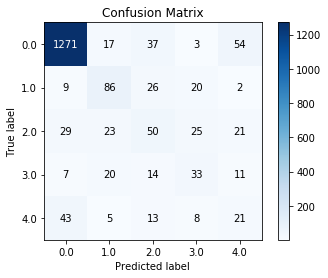

In [327]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

In [328]:
import graphviz
from sklearn.externals.six import StringIO

# install pydotplus first (if not already done)
import pydotplus

dot_data = StringIO() 
tree.export_graphviz(dt, out_file=dot_data, feature_names=X.columns,
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("dt.pdf")

True

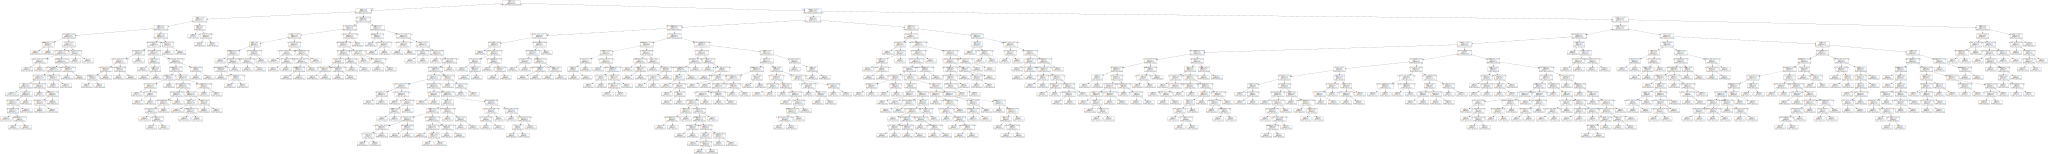

In [329]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(dt, out_file=None, feature_names=X.columns))

Decision Tree is very large, I need to minimize the noise and number of variables. The model is almost 80% accurate, so I am proud of it thus far. 

In [330]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

# You can make a simpler decision tree ... name the model "dt_simple" (max_depth=3, min_samples_leaf=5)
dt_simple = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

# Train a decision tree model
dt_simple = dt_simple.fit(X_train, y_train)

dt_simple

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [331]:
# Find out the performance of this model & interpret the results


print(metrics.accuracy_score(y_test, dt_simple.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt_simple.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt_simple.predict(X_test)))
print("--------------------------------------------------------")

0.8181818181818182
--------------------------------------------------------
[[1338    0   12    0   32]
 [  15   58   67    0    3]
 [  35    8   87    0   18]
 [  18    3   62    0    2]
 [  49    0   12    0   29]]
--------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      1382
         1.0       0.84      0.41      0.55       143
         2.0       0.36      0.59      0.45       148
         3.0       0.00      0.00      0.00        85
         4.0       0.35      0.32      0.33        90

    accuracy                           0.82      1848
   macro avg       0.49      0.46      0.45      1848
weighted avg       0.80      0.82      0.80      1848

--------------------------------------------------------


/Users/NeelGanta/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



My model is now 82% accurate after limiting to just 5 variables.

In [332]:
dot_data = StringIO() 
tree.export_graphviz(dt_simple, out_file=dot_data, feature_names=X.columns,
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("dt_simple.pdf")

True

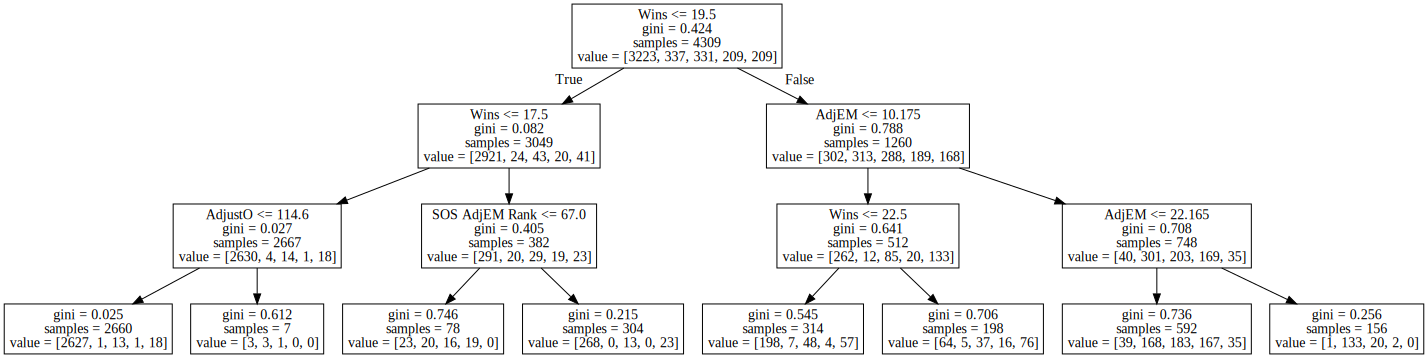

In [333]:
# another option

from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(dt_simple, out_file=None, feature_names=X.columns))

In [334]:

# split validation


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

# You can make a simpler decision tree ... name the model "dt_simple" (max_depth=3, min_samples_leaf=5)
knn = KNeighborsClassifier()

# Train a decision tree model
knn = knn.fit(X_train, y_train)

knn



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [335]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html

print(metrics.accuracy_score(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, knn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")

0.7873376623376623
--------------------------------------------------------
[[1348   13    7    5    9]
 [  47   65   22    9    0]
 [  75   36   22   12    3]
 [  37   25   13    9    1]
 [  73    2    3    1   11]]
--------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      1382
         1.0       0.46      0.45      0.46       143
         2.0       0.33      0.15      0.20       148
         3.0       0.25      0.11      0.15        85
         4.0       0.46      0.12      0.19        90

    accuracy                           0.79      1848
   macro avg       0.47      0.36      0.38      1848
weighted avg       0.73      0.79      0.75      1848

--------------------------------------------------------


## Clustering

In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

In [337]:
k_means = KMeans(init='k-means++', n_clusters=3, random_state=0)

In [338]:
cluster = bdf.drop(['Year', 'Rank', 'Team', 'Conference'], axis =1)
cluster.fillna(0, inplace = True)
k_means.fit(cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [339]:
#clustering results
k_means.labels_

array([1, 2, 0, ..., 0, 0, 0], dtype=int32)

In [340]:
#cluster centroids or centers
k_means.cluster_centers_

array([[ 1.75598166e+01,  1.10370988e+01,  2.91204669e+00,
         1.02696832e+01,  1.08431888e+02,  9.95143810e+01,
         9.81624427e+01,  9.23826594e+01,  6.66092955e+01,
         1.78789912e+02, -2.40725302e-03,  1.54180492e+02,
         5.06419758e+00,  5.98632764e+01,  9.27287620e+01,
         6.30437682e+01,  8.76640684e+01,  6.17444769e+01,
        -4.75894123e-01,  1.50429346e+02,  4.85379118e+01,
         1.28922051e+02,  1.98175852e+01,  1.78033764e+02,
         3.11097015e+01,  1.48300125e+02,  3.47494607e+01,
         1.42203001e+02,  4.85379118e+01,  1.28922051e+02,
         1.98175852e+01,  1.78033764e+02,  3.11097015e+01,
         1.48300125e+02,  3.47494607e+01,  1.42203001e+02],
       [ 1.28516820e+01,  1.72512742e+01,  9.95922528e-01,
        -7.79859837e+00,  9.91787971e+01,  2.30116718e+02,
         1.06977013e+02,  2.28281855e+02,  6.66123344e+01,
         1.56504587e+02,  1.56116208e-03,  1.67378695e+02,
        -3.49218145e+00,  2.21443425e+02,  9.95827217e+

In [341]:
#To add cluster label into the dataset as a column
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

cluster
0        1
1        2
2        0
3        1
4        2

In [342]:
df2 = cluster.join(df1)
df2.head(20)

Wins  Losses  Seed  AdjEM  AdjustO  AdjustO Rank  AdjustD  AdjustD Rank  \
0      9      19   0.0  -1.64    103.8           149    105.5           214   
1      9      21   0.0  -5.94    105.2           130    111.2           295   
2     27       8   2.0  18.73    114.0            24     95.3            32   
3     17      10   0.0  -9.53     92.2           304    101.7           136   
4     18      12   0.0 -12.62     90.1           312    102.7           159   
5      8      20   0.0 -20.29     87.0           321    107.3           244   
6     20      10  16.0  -8.71    100.1           213    108.8           268   
7     18      12   0.0  -4.01    101.0           198    105.1           209   
8      8      18   0.0  -6.25    102.1           181    108.3           263   
9     24      10   3.0  20.54    119.3             2     98.8            82   
10    14      15   0.0  10.54    108.6            78     98.1            69   
11    14      15   0.0  12.56    108.8            76     96.2            39   
12    16      11   0.0   5.75    106.8           105    101.1           124   
13     2      26   0.0 -28.85     82.2           326    111.1           294   
14    13      16   0.0   2.13    105.2           129    103.1           165   
15    10      16   0.0 -15.11     95.4           280    110.5           289   
16    12      16   0.0   6.61     98.6           238     92.0            12   
17    11      18   0.0  -2.98     99.4           221    102.4           151   
18    17      12   0.0  11.55    109.2            72     97.7            63   
19    23      12   0.0  12.66    113.3            32    100.6           117   

    AdjustT  AdjustT Rank  ...  O_Rank_FT_Rate  D_eFG_Pct  D_Rank_eFG_Pct  \
0      54.2           327  ...             318    52.0098             272   
1      65.6           251  ...             149    52.7171             287   
2      68.0           170  ...              85    46.0177              41   
3      79.0             1  ...             301    48.3791             137   
4      63.1           305  ...              38    45.7391              34   
5      62.7           308  ...             187    50.2094             210   
6      73.0            23  ...             106    48.7268             150   
7      62.9           306  ...              93    47.8999             109   
8      72.6            28  ...             180    52.9672             290   
9      71.1            59  ...              17    49.2377             168   
10     71.7            47  ...             324    50.8988             239   
11     71.9            44  ...             311    48.4601             138   
12     69.1           126  ...             138    48.6930             148   
13     75.5             5  ...             254    53.0704             296   
14     64.2           289  ...             134    45.9140              39   
15     68.0           172  ...             263    49.4444             181   
16     70.1            90  ...             140    44.8584              15   
17     67.3           198  ...              51    49.5354             186   
18     65.4           261  ...             107    48.8587             156   
19     69.1           130  ...              22    50.2332             211   

    D_TO_Pct  D_Rank_TO_Pct  D_OR_Pct  D_Rank_OR_Pct  D_FT_Rate  \
0    25.2716             19   38.7483            306    52.3380   
1    19.3857            273   37.0103            274    37.2711   
2    22.0335            123   34.8943            196    33.2842   
3    30.6673              1   39.2193            313    46.8828   
4    21.9774            129   32.1723             83    30.3188   
5    22.4291            108   34.5596            180    38.8695   
6    21.5505            158   33.3333            126    35.0663   
7    21.4571            163   30.8366             44    33.9716   
8    21.4385            166   34.4385            175    38.5732   
9    18.2890            306   35.9761            241    

In [343]:
#Profiling
df2.groupby('cluster').mean()

Wins     Losses      Seed      AdjEM     AdjustO  AdjustO Rank  \
cluster                                                                        
0        17.559583  11.039167  2.910833  10.266750  108.432125     99.505833   
1        12.854666  17.248853  0.996430  -7.795737   99.178429    230.122896   
2        14.965479  15.961581  1.576837  -5.207467  101.057572    204.223831   

            AdjustD  AdjustD Rank    AdjustT  AdjustT Rank  ...  O_FT_Rate  \
cluster                                                     ...              
0         98.165625     92.424583  66.608292    178.790417  ...  34.749931   
1        106.973789    228.235594  66.612392    156.510964  ...  41.409068   
2        106.265646    215.747216  65.898719    178.650334  ...  34.596920   

         O_Rank_FT_Rate  D_eFG_Pct  D_Rank_eFG_Pct   D_TO_Pct  D_Rank_TO_Pct  \
cluster                                                                        
0            142.208750  48.538411      128.952500  19.816476     178.077917   
1            245.291688  51.192669      228.888832  21.399417     107.289648   
2            130.594655  49.444343      166.213252  18.785946     233.345768   

          D_OR_Pct  D_Rank_OR_Pct  D_FT_Rate  D_Rank_FT_Rate  
cluster                                                       
0        31.109547     148.301667  34.749931      142.208750  
1        33.951612     236.326364  41.409068      245.291688  
2        31.075433     132.228842  34.596920      130.594655  

[3 rows x 36 columns]

In [344]:
df2.groupby(['cluster']).count()
#which cluster is the largest

Wins  Losses  Seed  AdjEM  AdjustO  AdjustO Rank  AdjustD  \
cluster                                                              
0        2400    2400  2400   2400     2400          2400     2400   
1        1961    1961  1961   1961     1961          1961     1961   
2        1796    1796  1796   1796     1796          1796     1796   

         AdjustD Rank  AdjustT  AdjustT Rank  ...  O_FT_Rate  O_Rank_FT_Rate  \
cluster                                       ...                              
0                2400     2400          2400  ...       2400            2400   
1                1961     1961          1961  ...       1961            1961   
2                1796     1796          1796  ...       1796            1796   

         D_eFG_Pct  D_Rank_eFG_Pct  D_TO_Pct  D_Rank_TO_Pct  D_OR_Pct  \
cluster                                                                 
0             2400            2400      2400           2400      2400   
1             1961            1961      1961           1961      1961   
2             1796            1796      1796           1796      1796   

         D_Rank_OR_Pct  D_FT_Rate  D_Rank_FT_Rate  
cluster                                            
0                 2400       2400            2400  
1                 1961       1961            1961  
2                 1796       1796            1796  

[3 rows x 36 columns]

In [345]:
#Profile the Clusters here


In [346]:
df_norm = (cluster - cluster.mean()) / (cluster.max() - cluster.min())
df_norm.head()

Wins    Losses      Seed     AdjEM   AdjustO  AdjustO Rank   AdjustD  \
0 -0.165904  0.146683 -0.119498 -0.019757  0.008110     -0.064357  0.053093   
1 -0.165904  0.211199 -0.119498 -0.071558  0.032458     -0.118334  0.192799   
2  0.307780 -0.208155  0.005502  0.225635  0.185501     -0.419470 -0.196907   
3  0.044622 -0.143639 -0.119498 -0.114806 -0.193629      0.375984 -0.040044   
4  0.070938 -0.079123 -0.119498 -0.152030 -0.230151      0.398711 -0.015534   

   AdjustD Rank   AdjustT  AdjustT Rank  ...  O_FT_Rate  O_Rank_FT_Rate  \
0      0.120302 -0.320279      0.441325  ...   0.328788        0.415759   
1      0.350416 -0.021066      0.225416  ...   0.009430       -0.064354   
2     -0.396743  0.041926     -0.004698  ...  -0.075077       -0.246173   
3     -0.101289  0.330640     -0.484811  ...   0.213159        0.367464   
4     -0.035948 -0.086683      0.378825  ...  -0.137931       -0.379695   

   D_eFG_Pct  D_Rank_eFG_Pct  D_TO_Pct  D_Rank_TO_Pct  D_OR_Pct  \
0   0.118500        0.285082  0.256759      -0.433675  0.257096   
1   0.153989        0.327696 -0.031014       0.287916  0.190835   
2  -0.182152       -0.371168  0.098442      -0.138220  0.110163   
3  -0.063669       -0.098441  0.520565      -0.484811  0.275053   
4  -0.196131       -0.391054  0.095699      -0.121175  0.006386   

   D_Rank_OR_Pct  D_FT_Rate  D_Rank_FT_Rate  
0       0.381679   0.328788        0.415759  
1       0.290770   0.009430       -0.064354  
2       0.069179  -0.075077       -0.246173  
3       0.401565   0.213159        0.367464  
4      -0.251844  -0.137931       -0.379695  

[5 rows x 36 columns]

In [347]:
# clustering analysis using k-means
k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)

In [348]:
k_means.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [349]:
# cluster labels

k_means.labels_

array([1, 2, 3, ..., 0, 0, 0], dtype=int32)

In [350]:
# find out cluster centers

k_means.cluster_centers_

array([[-4.02746553e-01, -4.66219933e-01, -1.19498132e-01,
         3.89046014e-07, -4.05904744e-02,  1.51887357e-02,
        -5.72981601e-02,  1.51887357e-02,  1.46950171e-01,
         1.51887357e-02, -2.33007097e-03, -4.58751247e-01,
         8.07362618e-03, -4.58751247e-01, -8.64355943e-01,
        -4.58751247e-01, -8.76825750e-01, -4.58751247e-01,
         2.60271780e-03, -4.58751247e-01,  5.64222438e-02,
         1.51876089e-02, -7.33368018e-02,  1.51887357e-02,
        -1.36630080e-01,  1.51614157e-02, -7.68731237e-02,
         1.51829948e-02,  5.64222438e-02,  1.51876089e-02,
        -7.33368018e-02,  1.51887357e-02, -1.36630080e-01,
         1.51614157e-02, -7.68731237e-02,  1.51829948e-02],
       [-6.99095689e-02,  1.11184069e-01, -7.16398562e-02,
        -1.00263965e-01, -7.80205373e-02,  1.76862153e-01,
         9.40314056e-02,  1.67386947e-01,  1.42067072e-03,
        -4.31227638e-02, -8.37080727e-04,  3.10530892e-02,
        -1.02733672e-01,  1.89601099e-01,  3.60227642e-

In [351]:
# convert cluster lables to dataframe

df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

cluster
0        1
1        2
2        3
3        1
4        2

In [352]:
# join df_norm & df1

df2 = df_norm.join(df1)
df2.head()

Wins    Losses      Seed     AdjEM   AdjustO  AdjustO Rank   AdjustD  \
0 -0.165904  0.146683 -0.119498 -0.019757  0.008110     -0.064357  0.053093   
1 -0.165904  0.211199 -0.119498 -0.071558  0.032458     -0.118334  0.192799   
2  0.307780 -0.208155  0.005502  0.225635  0.185501     -0.419470 -0.196907   
3  0.044622 -0.143639 -0.119498 -0.114806 -0.193629      0.375984 -0.040044   
4  0.070938 -0.079123 -0.119498 -0.152030 -0.230151      0.398711 -0.015534   

   AdjustD Rank   AdjustT  AdjustT Rank  ...  O_Rank_FT_Rate  D_eFG_Pct  \
0      0.120302 -0.320279      0.441325  ...        0.415759   0.118500   
1      0.350416 -0.021066      0.225416  ...       -0.064354   0.153989   
2     -0.396743  0.041926     -0.004698  ...       -0.246173  -0.182152   
3     -0.101289  0.330640     -0.484811  ...        0.367464  -0.063669   
4     -0.035948 -0.086683      0.378825  ...       -0.379695  -0.196131   

   D_Rank_eFG_Pct  D_TO_Pct  D_Rank_TO_Pct  D_OR_Pct  D_Rank_OR_Pct  \
0        0.285082  0.256759      -0.433675  0.257096       0.381679   
1        0.327696 -0.031014       0.287916  0.190835       0.290770   
2       -0.371168  0.098442      -0.138220  0.110163       0.069179   
3       -0.098441  0.520565      -0.484811  0.275053       0.401565   
4       -0.391054  0.095699      -0.121175  0.006386      -0.251844   

   D_FT_Rate  D_Rank_FT_Rate  cluster  
0   0.328788        0.415759        1  
1   0.009430       -0.064354        2  
2  -0.075077       -0.246173        3  
3   0.213159        0.367464        1  
4  -0.137931       -0.379695        2  

[5 rows x 37 columns]

In [353]:
#Profiling
df2.groupby('cluster').mean()

Wins    Losses      Seed         AdjEM   AdjustO  AdjustO Rank  \
cluster                                                                       
0       -0.402747 -0.466220 -0.119498  3.890460e-07 -0.040590      0.015189   
1       -0.069910  0.111184 -0.071640 -1.002640e-01 -0.078021      0.176862   
2       -0.021723  0.063760 -0.045954 -6.708444e-02 -0.038854      0.094595   
3        0.146522 -0.074426  0.121402  1.445731e-01  0.108104     -0.237783   

          AdjustD  AdjustD Rank   AdjustT  AdjustT Rank  ...  O_FT_Rate  \
cluster                                                  ...              
0       -0.057298      0.015189  0.146950      0.015189  ...  -0.076873   
1        0.094031      0.167387  0.001421     -0.043123  ...   0.100229   
2        0.081721      0.143960 -0.009811      0.012169  ...  -0.048989   
3       -0.141763     -0.270462 -0.017381      0.025543  ...  -0.035273   

         O_Rank_FT_Rate  D_eFG_Pct  D_Rank_eFG_Pct  D_TO_Pct  D_Rank_TO_Pct  \
cluster                                                                       
0              0.015183   0.056422        0.015188 -0.073337       0.015189   
1              0.208894   0.077874        0.166529  0.068690      -0.175618   
2             -0.117921  -0.000134        0.003277 -0.067410       0.187001   
3             -0.089341  -0.078155       -0.152664  0.007389      -0.002607   

         D_OR_Pct  D_Rank_OR_Pct  D_FT_Rate  D_Rank_FT_Rate  
cluster                                                      
0       -0.136630       0.015161  -0.076873        0.015183  
1        0.078737       0.176286   0.100229        0.208894  
2       -0.035465      -0.100054  -0.048989       -0.117921  
3       -0.017622      -0.075334  -0.035273       -0.089341  

[4 rows x 36 columns]

In [354]:
df2.groupby('cluster').size()

cluster
0     353
1    1891
2    1777
3    2136
dtype: int64

### Profiling
The 2nd cluster seems to hold the best teams, with high wins and low losses, with the best seed values as well. The first cluster has moderate teams, with a low win and loss value, and still maintains a seed but not very high. 

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

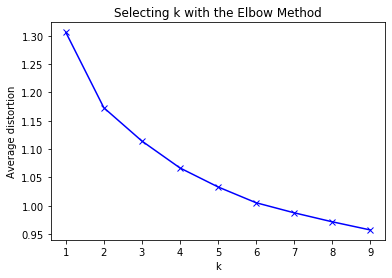

In [355]:
#The Elbow method

#https://www.packtpub.com/big-data-and-business-intelligence/mastering-machine-learning-scikit-learn#

#http://docs.scipy.org/doc/scipy/reference/spatial.distance.html
#Computes distance between each pair of the two collections of inputs
from scipy.spatial.distance import cdist 

K = range(1, 10) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k, random_state=1) 
    kmeans.fit(df_norm) 
    meandistortions.append(sum(np.min(cdist(df_norm, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df_norm.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 

### Hierarchical Clustering

In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.metrics import pairwise_distances

In [357]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=4, linkage='ward').fit(df_norm)
agg.labels_

array([0, 0, 3, ..., 2, 2, 2])

In [358]:
#To add cluster label into the dataset as a column
hdf1 = pd.DataFrame(agg.labels_, columns = ['cluster'])
hdf1.head()

cluster
0        0
1        0
2        3
3        1
4        0

In [359]:
hdf2 = cluster.join(hdf1)
hdf2.head()

Wins  Losses  Seed  AdjEM  AdjustO  AdjustO Rank  AdjustD  AdjustD Rank  \
0     9      19   0.0  -1.64    103.8           149    105.5           214   
1     9      21   0.0  -5.94    105.2           130    111.2           295   
2    27       8   2.0  18.73    114.0            24     95.3            32   
3    17      10   0.0  -9.53     92.2           304    101.7           136   
4    18      12   0.0 -12.62     90.1           312    102.7           159   

   AdjustT  AdjustT Rank  ...  O_Rank_FT_Rate  D_eFG_Pct  D_Rank_eFG_Pct  \
0     54.2           327  ...             318    52.0098             272   
1     65.6           251  ...             149    52.7171             287   
2     68.0           170  ...              85    46.0177              41   
3     79.0             1  ...             301    48.3791             137   
4     63.1           305  ...              38    45.7391              34   

   D_TO_Pct  D_Rank_TO_Pct  D_OR_Pct  D_Rank_OR_Pct  D_FT_Rate  \
0   25.2716             19   38.7483            306    52.3380   
1   19.3857            273   37.0103            274    37.2711   
2   22.0335            123   34.8943            196    33.2842   
3   30.6673              1   39.2193            313    46.8828   
4   21.9774            129   32.1723             83    30.3188   

   D_Rank_FT_Rate  cluster  
0             318        0  
1             149        0  
2              85        3  
3             301        1  
4              38        0  

[5 rows x 37 columns]

In [360]:
hdf2.groupby('cluster').mean()

Wins     Losses      Seed      AdjEM     AdjustO  AdjustO Rank  \
cluster                                                                        
0        16.322441  15.137726  2.078045   0.079571  103.413179    171.374021   
1        10.923858  19.271574  0.065144 -12.517107   97.462775    252.385787   
2         0.000000   0.000000  0.000000   0.000057  100.999717    177.000000   
3        22.714908  11.046790  4.352557  15.778781  111.460827     66.890098   

            AdjustD  AdjustD Rank    AdjustT  AdjustT Rank  ...  O_FT_Rate  \
cluster                                                     ...              
0        103.333999    167.130705  66.016095    173.061842  ...  37.656627   
1        109.978765    276.181049  66.724450    150.104907  ...  38.427865   
2        100.996034    177.000000  72.001416    177.000000  ...  33.199454   
3         95.684331     53.383025  65.395539    191.640914  ...  32.813328   

         O_Rank_FT_Rate  D_eFG_Pct  D_Rank_eFG_Pct   D_TO_Pct  D_Rank_TO_Pct  \
cluster                                                                        
0            182.104240  49.531062      169.415069  20.155851     169.252498   
1            193.175973  51.757111      249.604907  20.283705     162.366328   
2            176.997167  50.772566      176.997167  18.520056     177.000000   
3             99.804135  46.974871       78.344940  19.709820     191.219804   

          D_OR_Pct  D_Rank_OR_Pct  D_FT_Rate  D_Rank_FT_Rate  
cluster                                                       
0        31.853616     158.367540  37.656627      182.104240  
1        34.672233     258.085448  38.427865      193.175973  
2        28.421053     176.985836  33.199454      176.997167  
3        30.559686     111.942329  32.813328       99.804135  

[4 rows x 36 columns]

In [361]:
hdf2.groupby('cluster').size()

cluster
0    3703
1    1182
2     353
3     919
dtype: int64

### Profiling
The 4th cluster has the best teams, the third seems to have completely wiped out their data points. 


In [362]:
#Creating Big 12 Dataframe
B12 = bdf.loc[bdf['Conference']== 'B12']
B12.head()
# B12.to_csv('Big 12.csv')

Year  Rank        Team Conference  Wins  Losses  Seed  AdjEM  AdjustO  \
20   2002   106      Baylor        B12    12      16   NaN   4.69    108.2   
53   2002    87    Colorado        B12    14      14   NaN   6.78    111.3   
121  2002   113    Iowa St.        B12    12      19   NaN   4.16    108.1   
126  2002     4      Kansas        B12    33       4   1.0  28.99    118.7   
127  2002   120  Kansas St.        B12    13      16   NaN   3.67    104.0   

     AdjustO Rank  ...  O_FT_Rate  O_Rank_FT_Rate  D_eFG_Pct  D_Rank_eFG_Pct  \
20             80  ...    32.5666              73    53.1174             300   
53             45  ...    27.7628              14    49.8113             195   
121            85  ...    30.9884              48    49.2442             169   
126             5  ...    29.4168              25    45.8706              38   
127           146  ...    37.1513             146    47.4184              88   

     D_TO_Pct  D_Rank_TO_Pct  D_OR_Pct  D_Rank_OR_Pct  D_FT_Rate  \
20    19.6351            260   39.2016            312    32.5666   
53    16.4107            326   31.1287             52    27.7628   
121   20.5753            217   35.3716            220    30.9884   
126   20.6425            213   32.5214            101    29.4168   
127   19.6935            256   36.1085            249    37.1513   

     D_Rank_FT_Rate  
20               73  
53               14  
121              48  
126              25  
127             146  

[5 rows x 40 columns]

In [363]:
#Importing Big12 csv after manually updating in Excel
B12 = pd.read_csv('Big 12.csv')

In [364]:
#Creating dynamic scatter plot to show the change in team rank and adjem over time
px.scatter(B12, x = 'AdjEM', y = 'Rank',color='Team', size = 'Wins', 
           animation_frame = 'Year', animation_group = 'Team', range_x = [-15,40], range_y = [-20,300], 
           text ='Team')

The above dynamic scatterplot shows the change in Adjusted Efficiency Margins of Big 12 teams as it correlates to their rankings. The size of the Bubbles indicate their amount of wins.

In [365]:
B10 = bdf.loc[bdf['Conference']== 'B10']
px.scatter(B10, x = 'AdjEM', y = 'Rank',color='Team', size = 'Wins', 
           animation_frame = 'Year', animation_group = 'Team', range_x = [-10,40], range_y = [-20,370], text ='Team')

Similar to the previous, the above dynamic scatterplot shows the change in Adjusted Efficiency Margins of Big 10 teams as it correlates to their rankings. The size of the Bubbles indicate their amount of wins.

# Conclusion

#### The goal of this project is to determine the factors that have led to NCAA team success in the past, and to try and determine what factors may lead to such success in the future.

After collecting the data from Kenpom.com, I had to go through several different steps of data collection, cleaning and preparation. This spanned from scraping the data from the website, updating values, and cleaning the data to ensure all columns were of equal lengths and datatypes. 

Statistically I ran a heatmap, and found that AdjEM and Wins were closely correlated, Wins and AdjO were closely related, AdjEm and Rank were almost perfectly inversely correlated, Rank and AdjO were inversely correlated, and Rank and AdjD were correlated. For the purpose of my study, I focused in on Wins, Rank, and AdjEM as measures of team success.

In terms of Wins, it seemed the most important variables are Luck, AdjEM, AdjO, AdjD, SOS OppD. The R squared of this model is .94, which is extremely high. In a separate test, I concluded that AdjEM, SOS OppD, and Luck were the top 3 most important variables to correlate with Wins, with an R squared of .91. 

I decided to visualize the correlation between different variables and wins, and focus in on specific conferences, like the Big 12 and the Big 10. I found that these scatterplot visualizations were very telling in the changes of the conference and successful teams in them.